In [3]:
import pandas as pd
data = pd.read_csv("data/brain_size.csv", sep = ';', header = 0, na_values = '.')
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Splitting on values of categorical variables:

In [5]:
groupbyGender = data.groupby('Gender')

In [9]:
for gender, value in groupbyGender['VIQ']:
    print('{}: {}'.format(gender, value.mean()))

Female: 109.45
Male: 115.25


In [10]:
groupbyGender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [25]:
groupbyGender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


In [26]:
data['VIQ'].mean()

112.35

In [37]:
import numpy as np
groupbyGender['MRI_Count']

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

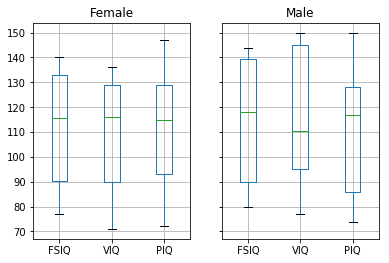

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = plt.subplots(1, 2)

#plt.subplots?

groupbyGender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d37bcd30>,
      dtype=object)

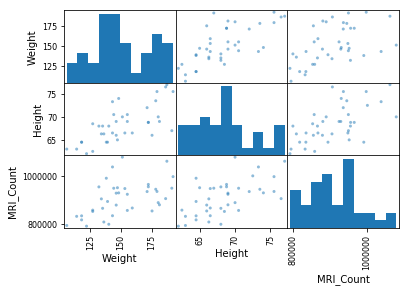

In [66]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d2a47160>,
      dtype=object)

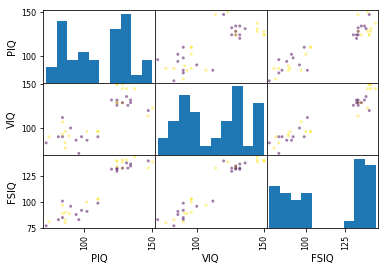

In [77]:
data['gender_int'] = np.nan
data.loc[data['Gender'] == 'Female', 'gender_int'] = 0
data.loc[data['Gender'] == 'Male', 'gender_int'] = 1
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']], c = data['gender_int'])  

In [85]:
from scipy import stats

stats.ttest_1samp(data['VIQ'], 105)

Ttest_1sampResult(statistic=1.968380371924721, pvalue=0.05616184962448135)

In [83]:
data['VIQ'].describe()

count     40.000000
mean     112.350000
std       23.616107
min       71.000000
25%       90.000000
50%      113.000000
75%      129.750000
max      150.000000
Name: VIQ, dtype: float64